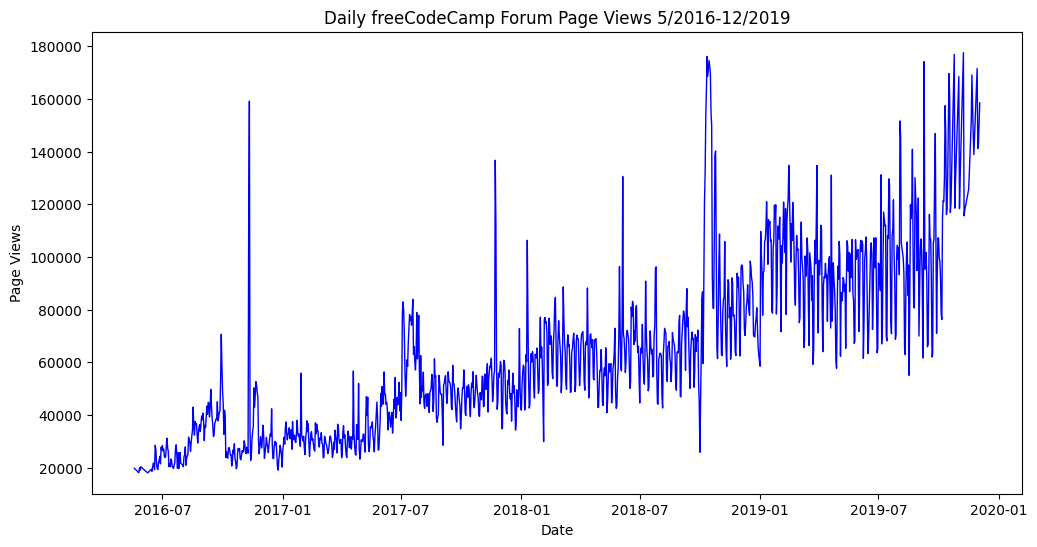

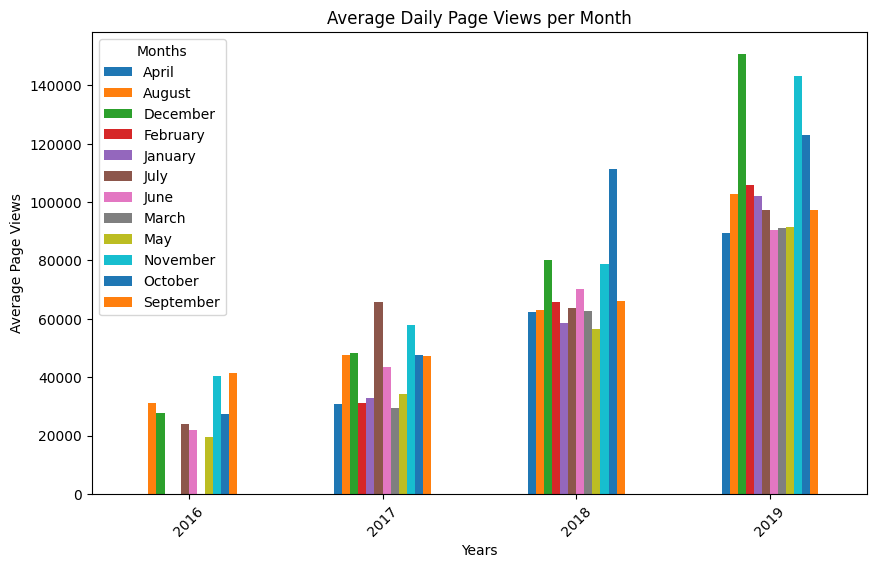

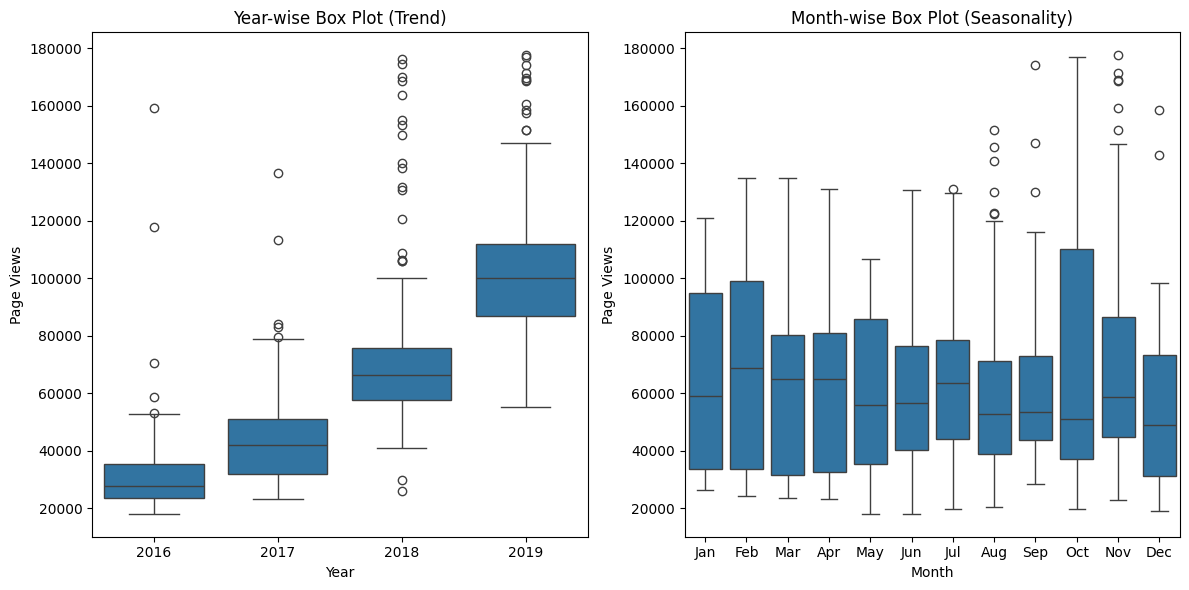

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Import the data
df = pd.read_csv(r'C:\jupyter folder\fcc-forum-pageviews.csv', parse_dates=["date"], index_col="date")

# Data cleaning
lower_bound = df['value'].quantile(0.025)
upper_bound = df['value'].quantile(0.975)

# Filter the DataFrame
df_filtered = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]

# Function to draw the line plot
def draw_line_plot():
    plt.figure(figsize=(12, 6))
    plt.plot(df_filtered.index, df_filtered['value'], color='blue', linewidth=1)
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.show()

# Function to draw the bar plot
def draw_bar_plot():
    df_bar = df_filtered.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()

    # Group by year and month and calculate the mean
    df_grouped = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Plotting
    plt.figure(figsize=(10, 6))
    df_grouped.plot(kind='bar', ax=plt.gca())
    plt.title('Average Daily Page Views per Month')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months')
    plt.xticks(rotation=45)
    plt.show()

# Function to draw the box plots
def draw_box_plot():
    df_box = df_filtered.copy()
    df_box['year'] = df_box.index.year
    df_box['month'] = df_box.index.month

    # Creating month names for the box plot
    df_box['month'] = df_box['month'].apply(lambda x: pd.to_datetime(f"2020-{x}-01").strftime("%b"))

    plt.figure(figsize=(12, 6))

    # Box plot for year-wise
    plt.subplot(1, 2, 1)
    sns.boxplot(x='year', y='value', data=df_box)
    plt.title('Year-wise Box Plot (Trend)')
    plt.xlabel('Year')
    plt.ylabel('Page Views')

    # Box plot for month-wise
    plt.subplot(1, 2, 2)
    sns.boxplot(x='month', y='value', data=df_box, 
                order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.title('Month-wise Box Plot (Seasonality)')
    plt.xlabel('Month')
    plt.ylabel('Page Views')

    plt.tight_layout()
    plt.show()

# Calling the functions to display the plots
draw_line_plot()
draw_bar_plot()
draw_box_plot()
